In [44]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [45]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [47]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [48]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [49]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [50]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [52]:
# Find the most recent date in the data set.
# Calculate the date one year from the last date in data set.
lastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
lastDate

'2017-08-23'

In [53]:
preYear = dt.datetime.strptime(lastDate,'%Y-%m-%d').date() - dt.timedelta(365)
preYear


datetime.date(2016, 8, 23)

In [54]:
lastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
preYear = dt.datetime.strptime(lastDate,'%Y-%m-%d') - dt.timedelta(365)
preYear
precipitation = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date > preYear).\
                order_by(Measurement.date).all()
precipitation

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [55]:
preYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)
precipitation = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= preYear).all()
precipitations = {date: prcp for date, prcp in precipitation}
precipitations

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

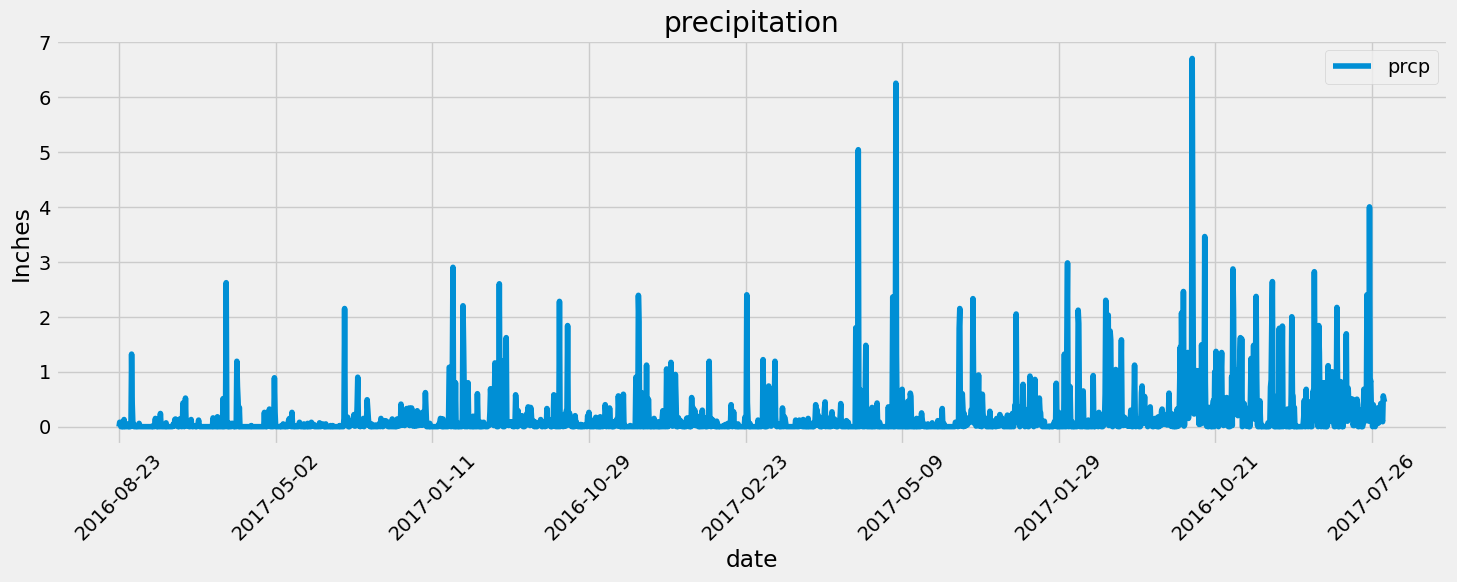

In [56]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain = pd.DataFrame(precipitation)
rain

# Sort the dataframe by date
raining = rain.sort_values("date").dropna()
raining = rain.set_index('date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
raining.plot(figsize = (16,5), rot=45, ylabel = "Inches", title = "precipitation")
plt.show()

In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
raining.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).first()[0]

9

In [59]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
mas = session.query(Measurement.station,func.count()).\
    group_by(Measurement.station).\
    order_by(func.count().desc()).all()
mas

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
mas[0][0]

'USC00519281'

In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == mas[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

In [64]:
lastDate_station = session.query(Measurement.date).order_by(Measurement.date.desc()).\
        filter(Measurement.station == mas[0][0]).first()[0]
preYear_station = dt.datetime.strptime(lastDate_station,'%Y-%m-%d').date() - dt.timedelta(365)
active = session.query(Measurement.date,Measurement.tobs).\
         filter(Measurement.date > preYear_station, Measurement.station==mas[0][0]).all()
temp_active = list(np.ravel(active))
df = pd.DataFrame(temp_active)
df

,0
0,2016-08-19
1,79.0
2,2016-08-20
3,81.0
4,2016-08-21
...,...
707,76.0
708,2017-08-17
709,76.0
710,2017-08-18


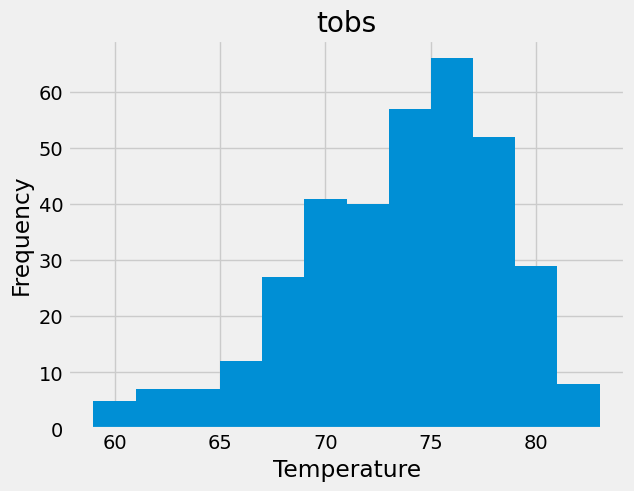

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result = session.query(Measurement.tobs).filter((Measurement.station == mas[0][0])&(Measurement.date > preYear)).all()
pd.DataFrame(result).hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [42]:
# Close Session
session.close()